In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm,tree,metrics
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("D:\Prem\Study Documents\Semester 3\Pattern Recognition\Thesis\Project\ECG\Feature_old.csv")

In [5]:
df.shape

(414, 72)

In [6]:
# Valance, Arousal, Dominance
feature_X=df.iloc[:,0:-3]
feature_V=df.iloc[:,-3]
feature_A=df.iloc[:,-2]
feature_D=df.iloc[:,-1]

X_train,X_test,Y_train,Y_test=train_test_split(feature_X,feature_V,test_size=0.3,random_state=7)

In [7]:
feature_X.head()

,Unnamed: 0,psdtheta_1,psdalpha_1,psdbeta_1,psdtheta_2,psdalpha_2,psdbeta_2,psdtheta_3,psdalpha_3,psdbeta_3,...,LFn,HFn,LnHF,SD1,SD2,SD2SD1,CSI,CVI,CSI_Modified,SampEn
0,0,-0.137607,-0.137238,-0.116997,-0.080612,-0.081118,-0.108773,-0.146683,-0.182929,-0.229771,...,2.373568,-0.804867,0.565932,-0.319390,-0.242938,-0.092276,-0.092276,-0.227995,-0.242590,-0.591364
1,1,-0.139174,-0.138685,-0.117599,-0.096207,-0.096338,-0.110293,-0.119051,-0.104170,-0.091178,...,-0.310453,-0.117790,0.900424,1.657676,0.331446,-0.705940,-0.705940,1.167664,-0.276722,0.497739
2,2,-0.127690,-0.127539,-0.110420,-0.101203,-0.101259,-0.098381,-0.105765,-0.105699,0.042209,...,-0.356057,-0.169753,0.337649,-0.081641,0.142392,0.137403,0.137403,0.201158,0.002242,-0.598682
3,3,-0.158972,-0.158123,-0.131111,-0.100674,-0.100739,-0.097964,-0.069629,-0.030775,-0.003793,...,-0.404926,-0.025817,0.148437,0.678827,0.322955,-0.234828,-0.234828,0.745119,-0.078352,-0.753730
4,4,-0.110480,-0.110713,-0.099031,-0.111506,-0.111337,-0.089051,0.049651,0.050012,0.054975,...,-0.391056,3.513924,1.472641,-0.939539,-0.859683,-0.336588,-0.336588,-1.183689,-0.547362,0.520783


In [8]:
X_train.head()

,Unnamed: 0,psdtheta_1,psdalpha_1,psdbeta_1,psdtheta_2,psdalpha_2,psdbeta_2,psdtheta_3,psdalpha_3,psdbeta_3,...,LFn,HFn,LnHF,SD1,SD2,SD2SD1,CSI,CVI,CSI_Modified,SampEn
62,62,-0.141114,-0.140692,-0.119448,-0.104710,-0.104699,-0.101114,-0.082800,-0.082761,-0.079441,...,-0.232605,-0.114209,-0.650529,0.650951,-0.372099,-0.834526,-0.834526,0.174463,-0.530635,-0.626467
139,139,0.073790,0.069636,0.023678,-0.089031,-0.089341,-0.089014,0.007956,0.008225,0.012635,...,0.193562,-0.868610,-0.411005,0.056721,0.229485,0.113600,0.113600,0.299289,0.030168,-0.254505
165,165,-0.013854,-0.016193,-0.034849,-0.136049,-0.135344,-0.124984,0.004423,0.004773,0.009640,...,-0.346106,-0.606241,-0.381628,0.247812,0.766847,0.495424,0.495424,1.035840,0.450107,-1.703384
314,314,-0.196012,-0.199320,-0.186371,-0.110672,-0.110513,-0.116581,-0.223288,-0.223314,-0.219851,...,0.026029,-0.200398,-0.394567,1.440064,-0.236440,-0.930791,-0.930791,0.447371,-0.540515,0.318586
73,73,-0.079468,-0.080361,-0.106198,-0.094159,-0.094358,-0.092928,-0.006710,-0.006439,-0.001862,...,-0.154904,0.077532,-0.341471,-0.548749,-0.254354,0.104424,0.104424,-0.385843,-0.180756,-0.448998


In [9]:
scalar = StandardScaler().fit(X_train)

In [10]:
print(scalar)

StandardScaler()


In [11]:
X_train_scaled = scalar.transform(X_train)

In [12]:
print(X_train_scaled)

[[-1.19261188 -0.16416244 -0.16337205 ...  0.19734031 -0.5112989
  -0.64757225]
 [-0.54925312  0.01666869  0.01359826 ...  0.32137198  0.08314031
  -0.27064393]
 [-0.3320151  -0.05707981 -0.0586186  ...  1.0532352   0.52826597
  -1.73886851]
 ...
 [-1.5017583  -0.23266798 -0.23032493 ...  0.71562481 -0.32030688
   1.29097023]
 [-0.07300053 -0.13830683 -0.13807351 ... -0.45604905 -0.26510773
  -0.33779617]
 [-0.24846201 -0.18896927 -0.18760407 ...  0.32625174  0.3096486
  -0.15701199]]


In [13]:
X_test.head()

,Unnamed: 0,psdtheta_1,psdalpha_1,psdbeta_1,psdtheta_2,psdalpha_2,psdbeta_2,psdtheta_3,psdalpha_3,psdbeta_3,...,LFn,HFn,LnHF,SD1,SD2,SD2SD1,CSI,CVI,CSI_Modified,SampEn
258,258,-0.249189,-0.247980,-0.192473,-0.110200,-0.110053,-0.105823,-0.068587,-0.068429,-0.213521,...,0.144568,-0.390791,0.020082,-0.683698,-0.738277,-0.399922,-0.399922,-0.776803,-0.520233,-0.066232
109,109,-0.118355,-0.108406,-0.091417,-0.136241,-0.134436,-0.106759,-0.229440,-0.220518,-0.130710,...,-0.385106,1.385564,-0.298614,0.011067,-1.214706,-1.374222,-1.374222,-0.946618,-0.870889,1.324420
90,90,-0.209398,-0.207427,-0.164479,-0.131276,-0.130673,-0.121324,-0.283281,-0.283458,-0.280658,...,-0.171066,-1.150239,-0.259189,-0.445489,1.748704,2.456886,2.456886,0.838386,2.199353,-1.245896
148,148,-0.276849,-0.273391,-0.209189,-0.135012,-0.134333,-0.124204,-0.133681,-0.113607,0.081133,...,-0.310472,0.074449,-0.857192,-1.070383,-1.066707,-0.525492,-0.525492,-1.615853,-0.661820,0.809403
388,388,-0.279400,-0.275885,-0.210879,-0.152776,-0.151713,-0.137803,-0.364385,-0.364681,-0.362319,...,-0.183502,-0.831548,-0.494745,-1.131806,-0.767932,-0.014093,-0.014093,-1.214538,-0.420367,0.901645


In [14]:
scaler = StandardScaler().fit(X_test)

In [15]:
X_test_scaled = scalar.transform(X_test)

In [16]:
print(X_test_scaled)

[[ 0.4450286  -0.25510224 -0.2536442  ... -0.74787182 -0.50027228
  -0.07985729]
 [-0.79991238 -0.14501239 -0.13620606 ... -0.91660627 -0.87195957
   1.32936399]
 [-0.95866324 -0.2216204  -0.2195228  ...  0.85703817  2.38242619
  -1.27527229]
 ...
 [-0.99208447 -0.11036412 -0.11160022 ... -0.46825135 -0.33711337
  -0.7535352 ]
 [-1.40149459 -0.12994574 -0.12981621 ... -0.90624941 -0.78511123
  -0.30899518]
 [-1.69393039 -0.15286669 -0.15230448 ...  0.22386537  0.0535392
  -0.61941591]]


In [17]:
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Linear Regression 
LM=linear_model.LinearRegression()

In [18]:
kf = KFold(n_splits=8)
mse_err = 0
mae_err = 0
LinearRMSE = 0
for train, test in kf.split(df):
    LM.fit(X_train_scaled,Y_train)
    linearpredicted = LM.predict(X_test_scaled)
    mae_err += mean_absolute_error(Y_test,linearpredicted)
    mse_err += mean_squared_error(Y_test,linearpredicted)
    LinearRMSE += np.sqrt(mean_squared_error(Y_test,linearpredicted))
    mae = mae_err/12
    mse = mse_err/12
    rmse = LinearRMSE/12
print('Linear Regression MAE : ', mae)
print('Linear Regression MSE : ', mse)
print('Linear Regression RMSE : ', rmse)

Linear Regression MAE :  0.3502849008767723
Linear Regression MSE :  0.2657195975334306
Linear Regression RMSE :  0.42088763150705727


In [19]:
#Fit the model over the training dataset
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
#Calculate intercept and coefficient
print(model.intercept_)
print(model.coef_)
pred=model.predict(X_test_scaled)
predictions = pred.reshape(-1,1)

0.37716262975778525
[ 8.39045978e-03  4.08000159e+00 -4.15493003e+00  1.20217920e-01
  4.31526123e+00 -4.45822649e+00  2.02843952e-01  2.00148645e-01
 -2.10992280e-01  1.47894270e-02  8.06597801e-01 -1.05037811e+00
  2.83020385e-01 -2.10488593e+00  2.28850256e+00 -2.09754918e-01
  1.79345421e+00 -2.04508860e+00  2.74337256e-01 -6.42938831e+00
  7.14054079e+00 -6.90728373e-01 -2.58924453e-01  3.83183916e-02
  1.93984282e-01  1.60777814e+00 -1.64078582e+00  8.38615646e-02
  1.87863885e+00 -1.95776354e+00  1.58912277e-01 -1.30250902e+00
  1.71430405e+00 -4.19759533e-01 -2.58334536e+00  2.93537818e+00
 -3.06867112e-01 -1.58152359e+01  1.81245680e+01 -2.38716491e+00
  1.67759015e+00 -1.64362283e+00 -5.84840661e-02  2.60138724e-01
 -2.36417376e-01  2.57998440e-01 -8.16594993e-01 -2.34359895e-01
 -3.04614640e-01  7.31083308e-01 -6.83932366e-02  1.22551448e+00
 -1.26401264e+00  4.45211603e-02 -3.98507512e-02  1.47630225e-01
 -5.72911754e-02 -1.22974628e-02  4.13168908e-02 -1.74698469e-01
  7.8

In [63]:
#Calculate root mean squared error to evaluate model performance Linear Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error
LinearMAE = mean_absolute_error(Y_test,predictions)
LinearMSE = mean_squared_error(Y_test,predictions)
LinearRMSE = np.sqrt(mean_squared_error(Y_test,predictions))
print('Linear Regression MAE : ', mean_absolute_error(Y_test,predictions))
print('Linear Regression MSE : ', mean_squared_error(Y_test,predictions))
print('Linear Regression RMSE : ', np.sqrt(mean_squared_error(Y_test,predictions)))

Linear Regression MAE :  0.5254273513151672
Linear Regression MSE :  0.39857939630015016
Linear Regression RMSE :  0.6313314472605892


In [80]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l2',C=1.0,max_iter=1000)
logreg.fit(X_train_scaled, Y_train)
logregpred = logreg.predict(X_test_scaled)
logregprediction = logregpred.reshape(-1,1)

In [81]:
#Calculate root mean squared error to evaluate model performance Logistic Regression
LogisticMAE = mean_absolute_error(Y_test,logregprediction)
LogisticMSE = mean_squared_error(Y_test,logregprediction)
LogisticRMSE = np.sqrt(mean_squared_error(Y_test,logregprediction))
print('Logistic Regression MAE : ', mean_absolute_error(Y_test,logregprediction))
print('Logistic Regression MSE : ', mean_squared_error(Y_test,logregprediction))
print('Logistic Regression RMSE : ', np.sqrt(mean_squared_error(Y_test,logregprediction)))

Logistic Regression MAE :  0.456
Logistic Regression MSE :  0.456
Logistic Regression RMSE :  0.6752777206453653


In [82]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [83]:
dtr.fit(X_train_scaled, Y_train)
dtrpred = dtr.predict(X_test_scaled)
dtrprediction = dtrpred.reshape(-1,1)

In [67]:
DecisionTreeMAE = mean_absolute_error(Y_test,dtrprediction)
DecisionTreeMSE = mean_squared_error(Y_test,dtrprediction)
DecisionTreeRMSE = np.sqrt(mean_squared_error(Y_test,dtrprediction))
print('DecisionTreeRegressor MAE : ', mean_absolute_error(Y_test,dtrprediction))
print('DecisionTreeRegressor MSE : ', mean_squared_error(Y_test,dtrprediction))
print('DecisionTreeRegressor RMSE : ', np.sqrt(mean_squared_error(Y_test,dtrprediction)))

DecisionTreeRegressor MAE :  0.472
DecisionTreeRegressor MSE :  0.472
DecisionTreeRegressor RMSE :  0.6870225614927067


In [68]:
from sklearn.svm import SVR # Support Vector Regression
# Fit regression model
svr = SVR().fit(X_train_scaled, Y_train)
# Predict
svrpred = svr.predict(X_test_scaled)
svrprediction = svrpred.reshape(-1,1)

In [69]:
SVRMAE = mean_absolute_error(Y_test,svrprediction)
SVRMSE = mean_squared_error(Y_test,svrprediction)
SVRRMSE = np.sqrt(mean_squared_error(Y_test,svrprediction))
print('Support Vector Regression MAE : ', mean_absolute_error(Y_test,svrprediction))
print('Support Vector Regression MSE : ', mean_squared_error(Y_test,svrprediction))
print('Support Vector Regression RMSE : ', np.sqrt(mean_squared_error(Y_test,svrprediction)))

Support Vector Regression MAE :  0.4663628751355776
Support Vector Regression MSE :  0.32018145977423323
Support Vector Regression RMSE :  0.5658457915141132


In [70]:
# Lasso Regression
# Fit regression model
lassoReg = linear_model.Lasso(alpha=0.1)
lassoReg.fit(X_train_scaled,Y_train)
# Predict
lassoRegpred = lassoReg.predict(X_test_scaled)
lassoRegprediction = lassoRegpred.reshape(-1,1)

In [71]:
LassoMAE = mean_absolute_error(Y_test,lassoRegprediction)
LassoMSE = mean_squared_error(Y_test,lassoRegprediction)
LassoRMSE = np.sqrt(mean_squared_error(Y_test,lassoRegprediction))
print('Lasso Regression MAE : ', mean_absolute_error(Y_test,lassoRegprediction))
print('Lasso Regression MSE : ', mean_squared_error(Y_test,lassoRegprediction))
print('Lasso Regression RMSE : ', np.sqrt(mean_squared_error(Y_test,lassoRegprediction)))

Lasso Regression MAE :  0.4832941176470588
Lasso Regression MSE :  0.24838313717508162
Lasso Regression RMSE :  0.4983805144416078


In [72]:
from sklearn import neighbors
model = neighbors.KNeighborsRegressor(n_neighbors = 10)
model.fit(X_train_scaled, Y_train)  #fit the model
neighborpred=model.predict(X_test_scaled) #make prediction on test set
neighborprediction = neighborpred.reshape(-1,1)

In [73]:
NeighborMAE = mean_absolute_error(Y_test,neighborprediction)
NeighborMSE = mean_squared_error(Y_test,neighborprediction)
NeighborRMSE = np.sqrt(mean_squared_error(Y_test,neighborprediction))
print('KNN Regression MAE : ', mean_absolute_error(Y_test,neighborprediction))
print('KNN Regression MSE : ', mean_squared_error(Y_test,neighborprediction))
print('KNN Regression RMSE : ', np.sqrt(mean_squared_error(Y_test,neighborprediction)))

KNN Regression MAE :  0.4728
KNN Regression MSE :  0.26584
KNN Regression RMSE :  0.5155967416499061


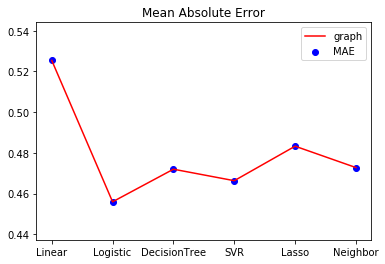

In [74]:
X=['Linear','Logistic','DecisionTree','SVR','Lasso','Neighbor']
Y=[LinearMAE,LogisticMAE,DecisionTreeMAE,SVRMAE,LassoMAE,NeighborMAE]
plt.title("Mean Absolute Error")
plt.scatter(X, Y, color="blue", label="MAE")
plt.plot(X, Y, color="red", label="graph")
plt.legend()
plt.show() 

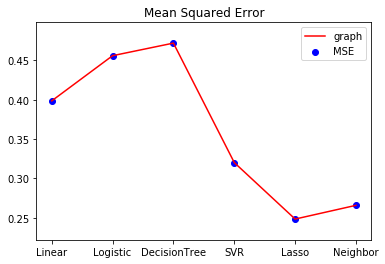

In [75]:
X=['Linear','Logistic','DecisionTree','SVR','Lasso','Neighbor']
Y=[LinearMSE,LogisticMSE,DecisionTreeMSE,SVRMSE,LassoMSE,NeighborMSE]
plt.title("Mean Squared Error")
plt.scatter(X, Y, color="blue", label="MSE")
plt.plot(X, Y, color="red", label="graph")
plt.legend()
plt.show() 

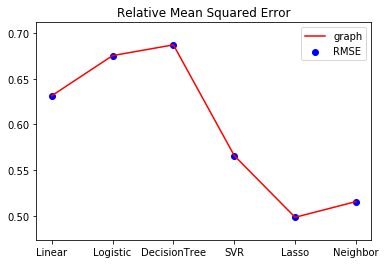

In [76]:
X=['Linear','Logistic','DecisionTree','SVR','Lasso','Neighbor']
Y=[LinearRMSE,LogisticRMSE,DecisionTreeRMSE,SVRRMSE,LassoRMSE,NeighborRMSE]
plt.title("Relative Mean Squared Error")
plt.scatter(X, Y, color="blue", label="RMSE")
plt.plot(X, Y, color="red", label="graph")
plt.legend()
plt.show()